In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib as mpl
import seaborn as sns

In [37]:
df = pd.read_csv('./Weather.csv')
df = df[['MinTemp', 'MaxTemp']]
df.head()

C:\Users\Helios\AppData\Local\Temp\ipykernel_10916\3049759509.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Weather.csv')


,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667


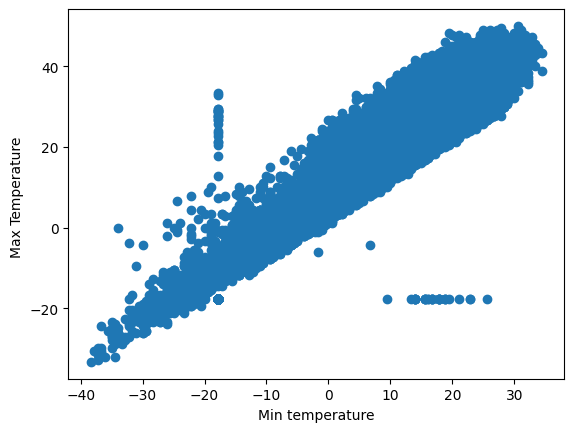

In [38]:
plt.scatter(df.MinTemp,df.MaxTemp)
plt.xlabel("Min temperature")
plt.ylabel("Max Temperature ")
plt.show()

In [39]:
df.MinTemp.isna().sum()

0

In [40]:
df.MaxTemp.isna().sum()

0

In [41]:
# define the vectorized MSE cost function
def mse_cost(predictions, target):
    N = predictions.shape[0]
    diff = predictions.ravel() - target.ravel()
    cost = diff.dot( diff.T) / N
    return cost
mse_cost(np.array([1,2,3]),np.array([3,4,5]))

4.0

In [42]:
vis_df=df.sample(frac=0.1)

In [43]:
vis_df

,MinTemp,MaxTemp
113722,21.111111,33.333333
117889,16.666667,25.000000
98572,22.222222,32.222222
98086,24.444444,30.555556
31907,23.333333,29.444444
...,...,...
118593,11.111111,25.555556
49545,3.888889,11.111111
75381,23.333333,41.111111
95024,3.333333,10.000000


In [52]:
X=vis_df.iloc[:,0].to_numpy().reshape(-1,1)
y=vis_df.iloc[:,1].to_numpy().reshape(-1,1)
X

array([[21.11111111],
       [16.66666667],
       [22.22222222],
       ...,
       [23.33333333],
       [ 3.33333333],
       [ 5.55555556]])

In [53]:
y

array([[33.33333333],
       [25.        ],
       [32.22222222],
       ...,
       [41.11111111],
       [10.        ],
       [11.66666667]])

In [48]:
def LinearModel(thetas,X):
    X=(X-X.mean())/X.std()
    X=np.hstack((X,np.ones((X.shape[0],1),dtype=X.dtype)))
    return np.dot(X,thetas)


In [49]:
start,end,step=-200,200,5
thetas_0,thetas_1=np.arange(start,end,step),np.arange(start,end,step)

In [50]:
thetas_0

array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
       -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
        -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
        -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
         20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
         75,   80,   85,   90,   95,  100,  105,  110,  115,  120,  125,
        130,  135,  140,  145,  150,  155,  160,  165,  170,  175,  180,
        185,  190,  195])

In [54]:
# loop over the all the parameter pairs and create a list of all possible pairs
thetas_lst = []
for theta_0 in thetas_0:
    for theta_1 in thetas_1:
        thetas_lst.append(np.array([theta_1, theta_0]).reshape(-1, 1))

linear_cost_lst = []       
for thetas in thetas_lst:
    # get prediction from our model
    pred_linear = LinearModel(thetas, X)
    # keep track of the cast per parameter pairs
    linear_cost_lst.append(mse_cost(pred_linear, y))

In [55]:
import plotly.graph_objects as go

In [56]:
axis_length = len(np.arange(start, end, step))
linear_cost_matrix = np.array(linear_cost_lst).reshape(axis_length, axis_length)

In [60]:
# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=linear_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'contours': {'z': {'highlightcolor': 'limegreen',
                                 'project': {'z': True},
                                 'show': True,
                                 'usecolormap': True}},
              'type': 'surface',
              'x': array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150, -145,
                          -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,
                           -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,
                           -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
                            40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,   95,
                           100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,  155,
                           160,  165,  170,  175,  180,  185,  190,  195]),
              'y': array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150, -145,
                          -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,
                           -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,
                           -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
                            40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,   95,
                           100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,  155,
                           160,  165,  170,  175,  180,  185,  190,  195]),
              'z': array([[94725.32148365, 92671.88148793, 90668.44149221, ..., 82910.44181333,
                           84707.00181761, 86553.56182189],
                          [92480.77203248, 90427.33203677, 88423.89204105, ..., 80665.89236217,
                           82462.45236645, 84309.01237073],
                          [90286.22258132, 88232.7825856 , 86229.34258988, ..., 78471.342911  ,
                           80267.90291528, 82114.46291957],
                          ...,
                          [68195.01374398, 66141.57374826, 64138.13375254, ..., 56380.13407366,
                           58176.69407794, 60023.25408222],
                          [69800.46429281, 67747.0242971 , 65743.58430138, ..., 57985.5846225 ,
                           59782.14462678, 61628.70463106],
                          [71455.91484165, 69402.47484593, 67399.03485021, ..., 59641.03517133,
                           61437.59517561, 63284.15517989]])}],
    'layout': {'height': 700,
               'scene': {'xaxis': {'title': {'text': 'theta_0 (intercept)'}},
                         'yaxis': {'title': {'text': 'theta_1 (slope)'}},
                         'zaxis': {'title': {'text': 'MSE Cost'}}},
               'template': '...',
               'title': {'text': 'Linear Model MSE Cost Surface'},
               'width': 700}
})